<a href="https://colab.research.google.com/github/shausha/stock/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview:

"Trips & Travel.Com" aims to establish a viable business model to expand its customer base. To achieve this, the company plans to introduce a new range of travel packages. Currently, there are five types of packages offered: Basic, Standard, Deluxe, Super Deluxe, and King. An analysis of last year's data revealed that only 18% of customers purchased these packages. The marketing costs were high because customers were contacted at random, without utilizing available data effectively.

### Tasks to Solve :   
        -To predict which customer is more likely to purchase the newly introduced travel package   
        -Which variables are most significant.
        -Which segment of customers should be targeted more.

# PHASE - I
## 1.1 Data Ingestion:
    -The dataset is collected from Kaggle.
    -In this phase, we will load the dataset into a pandas DataFrame to facilitate further analysis. The dataset will be inspected to ensure it has been successfully loaded.

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Travel.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## PHASE - II
### 2.1 Data Understanding:

In this phase, we aim to gain a comprehensive understanding of the dataset. This involves examining the structure, summary statistics, and distributions of the data. Key steps include:

1. **Data Overview**: Reviewing the dataset's columns and data types to understand what kind of information is available.

   - Examine the first few rows of the dataset to understand its structure and contents.
   - Check the data types and missing values to assess data quality and completeness.

2. **Descriptive Statistics**: Calculating summary statistics (e.g., mean, median, standard deviation) to get a sense of the central tendency and variability of the data.

   - Compute summary statistics for numerical variables to understand their distribution and variability.

3. **Data Distributions**: Visualizing the distributions of key features to identify patterns, outliers, and potential data quality issues.

   - Generate histograms, box plots, or density plots to visualize the distribution of important variables.
   - Look for any skewness, multimodality, or outliers in the data distributions.

4. **Correlation Analysis**: Analyzing correlations between features to identify relationships that might be important for modeling.

   - Calculate the correlation matrix between numerical variables to identify strong correlations.
   - Visualize the correlation matrix using a heatmap to identify patterns of association between variables.


In [ ]:
print(df.columns)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


#### 2.2 Description of Data:

1. **CustomerID**: Unique identifier for each customer.
2. **ProdTaken**: Indicates whether the customer has taken a product or package (1 for yes, 0 for no).
3. **Age**: Age of the customer.
4. **TypeofContact**: Mode of contact with the customer (e.g., phone, email).
5. **CityTier**: Classification of the city where the customer resides (e.g., Tier 1, Tier 2, Tier 3).
6. **DurationOfPitch**: Duration of the sales pitch given to the customer (in minutes).
7. **Occupation**: Occupation of the customer.
8. **Gender**: Gender of the customer.
9. **NumberOfPersonVisiting**: Number of people visiting with the customer.
10. **NumberOfFollowups**: Number of follow-ups made to the customer.
11. **ProductPitched**: The specific product or package pitched to the customer.
12. **PreferredPropertyStar**: Star rating of the preferred property (e.g., 3-star, 4-star, 5-star).
13. **MaritalStatus**: Marital status of the customer (e.g., single, married).
14. **NumberOfTrips**: Number of trips taken by the customer.
15. **Passport**: Indicates whether the customer has a passport (1 for yes, 0 for no).
16. **PitchSatisfactionScore**: Customer's satisfaction score for the sales pitch (typically on a scale).
17. **OwnCar**: Indicates whether the customer owns a car (1 for yes, 0 for no).
18. **NumberOfChildrenVisiting**: Number of children accompanying the customer during the visit.
19. **Designation**: Job title or designation of the customer.
20. **MonthlyIncome**: Monthly incllness Tourism Package.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**2.3 Satistical Analysis**

In [ ]:
# Calculate and display descriptive statistics for numerical columns
print(df.describe())

          CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509      

In [ ]:
# Calculate and display descriptive statistics for categorical columns
print(df.describe(include=['object']))

       TypeofContact Occupation Gender ProductPitched MaritalStatus  \
count           4863       4888   4888           4888          4888   
unique             2          4      3              5             4   
top     Self Enquiry   Salaried   Male          Basic       Married   
freq            3444       2368   2916           1842          2340   

       Designation  
count         4888  
unique           5  
top      Executive  
freq          1842  


In [11]:
# Fill NaN values in numerical columns with mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill NaN values in categorical columns with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if there are any missing values after filling
print("Missing values count after filling:")
print(df.isna().sum())


Missing values count after filling:
CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


**2.4 Visualisation**

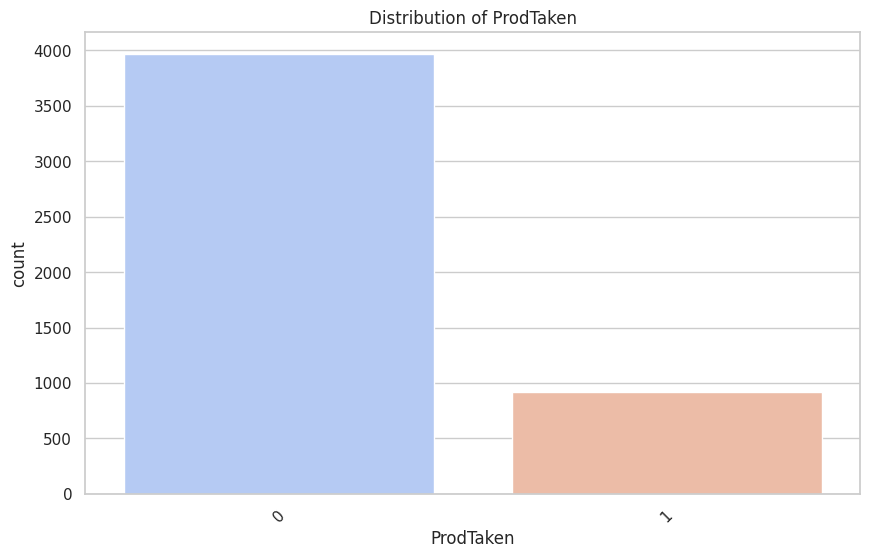

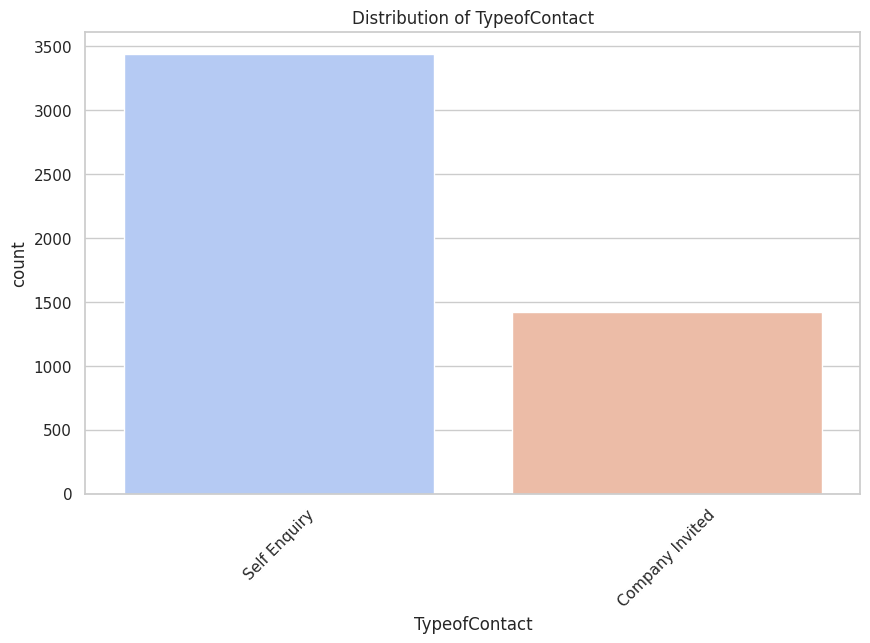

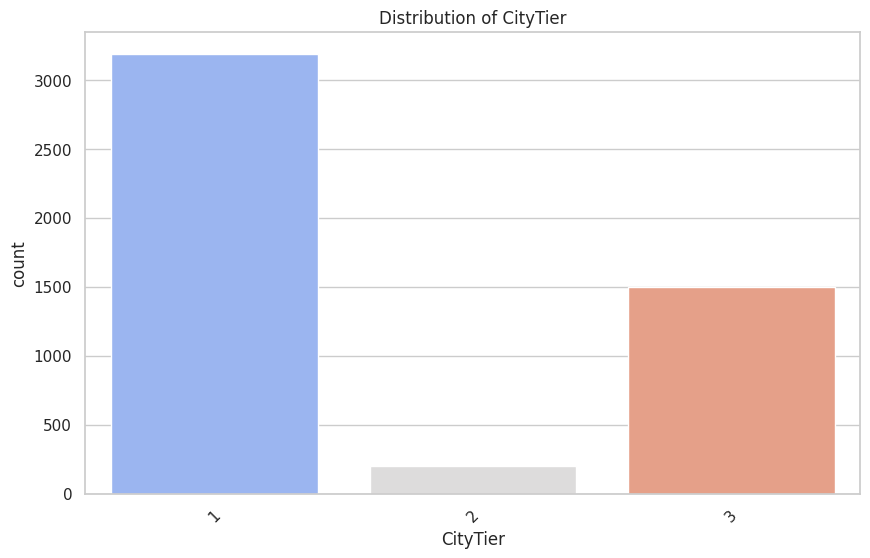

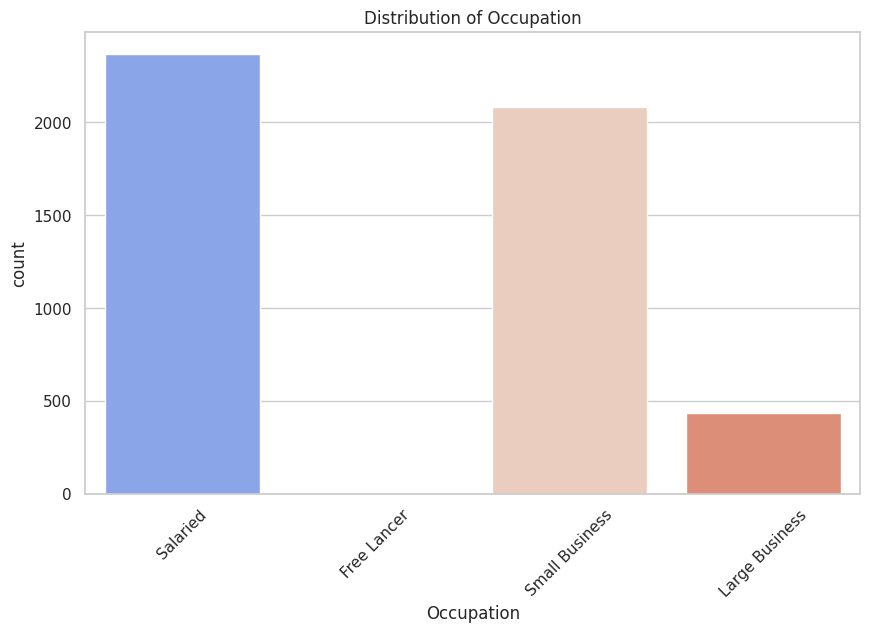

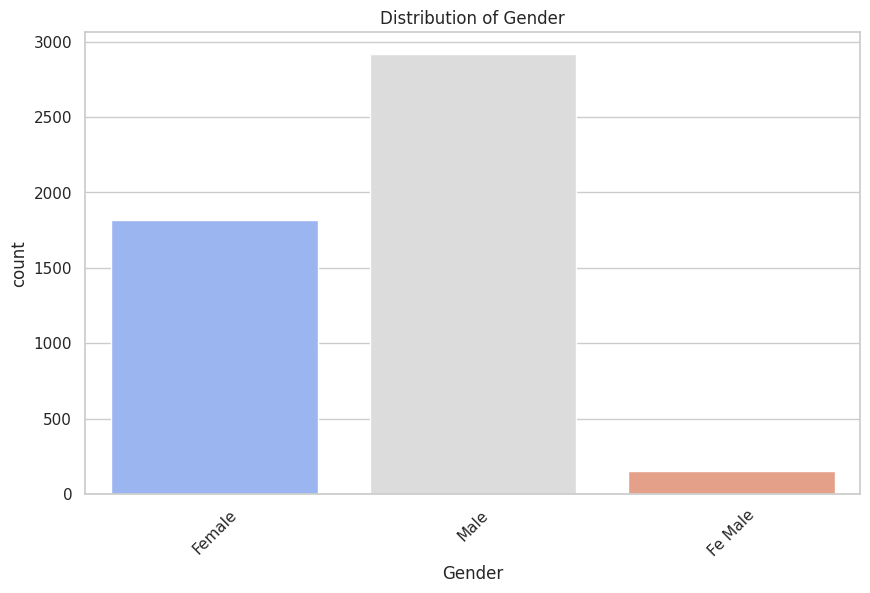

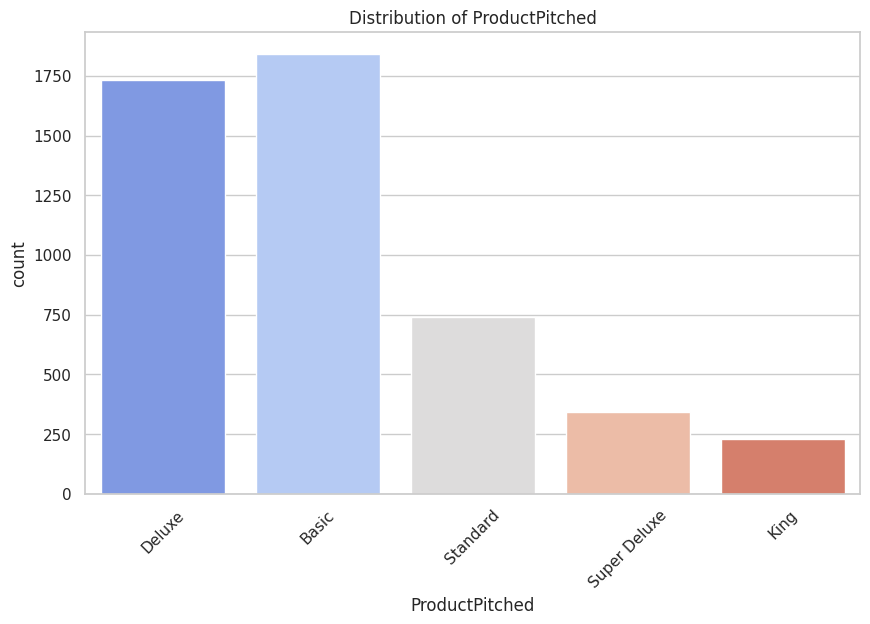

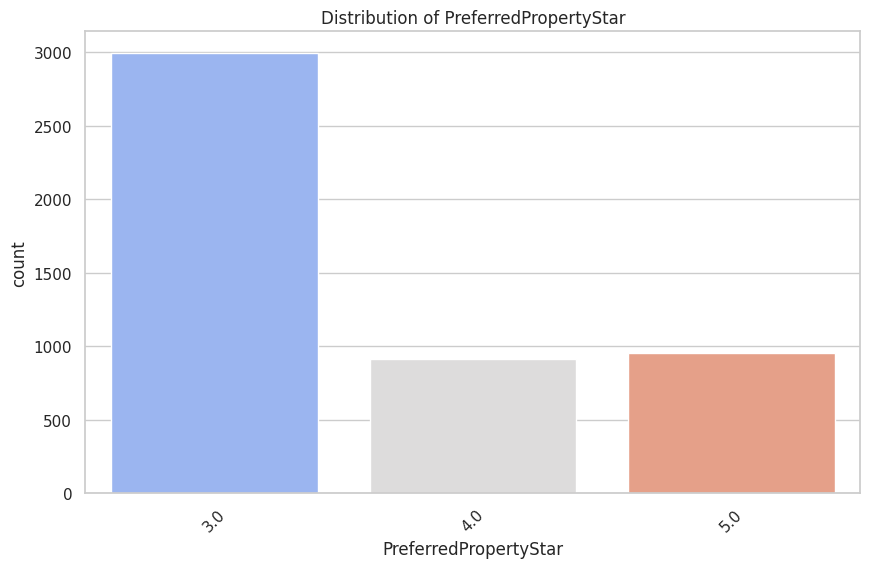

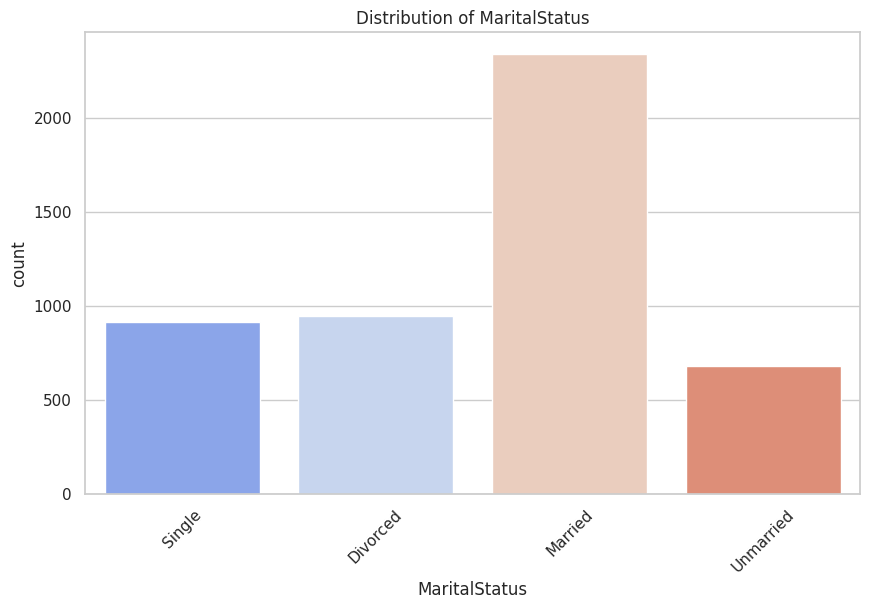

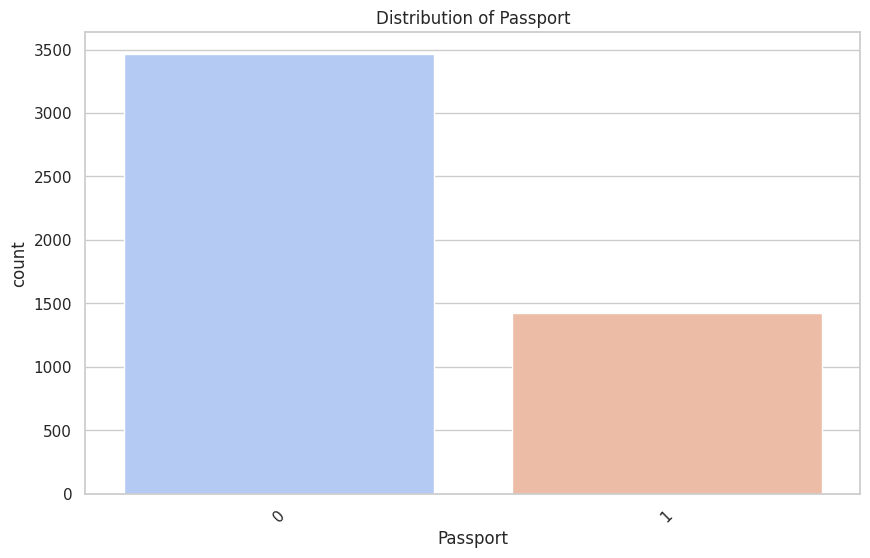

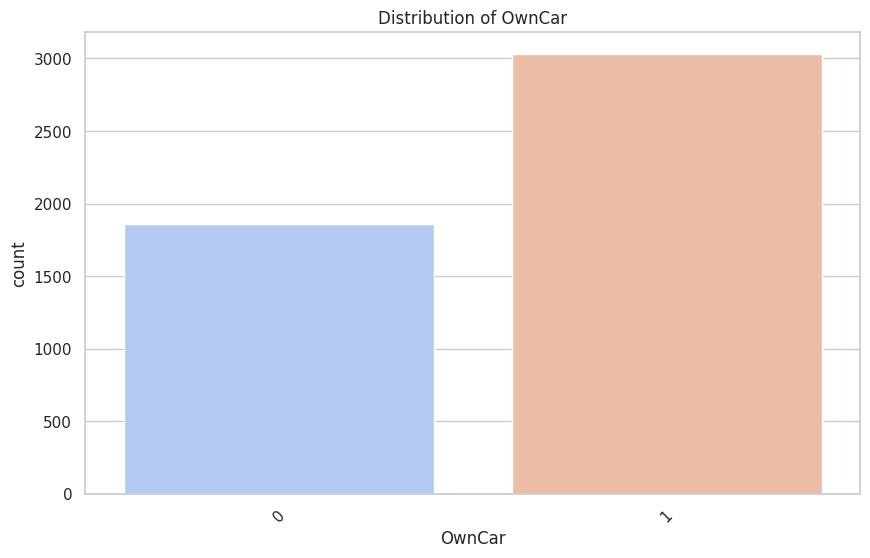

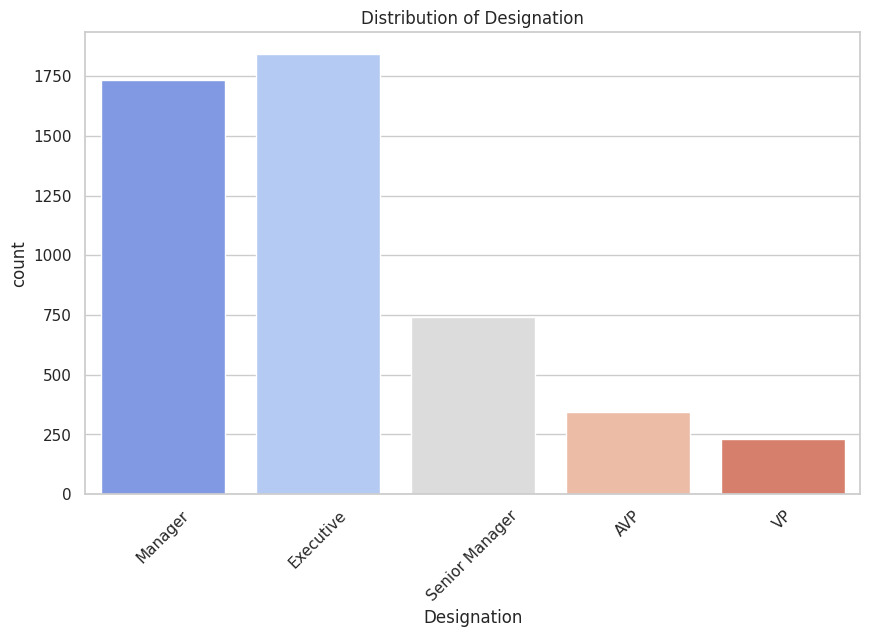

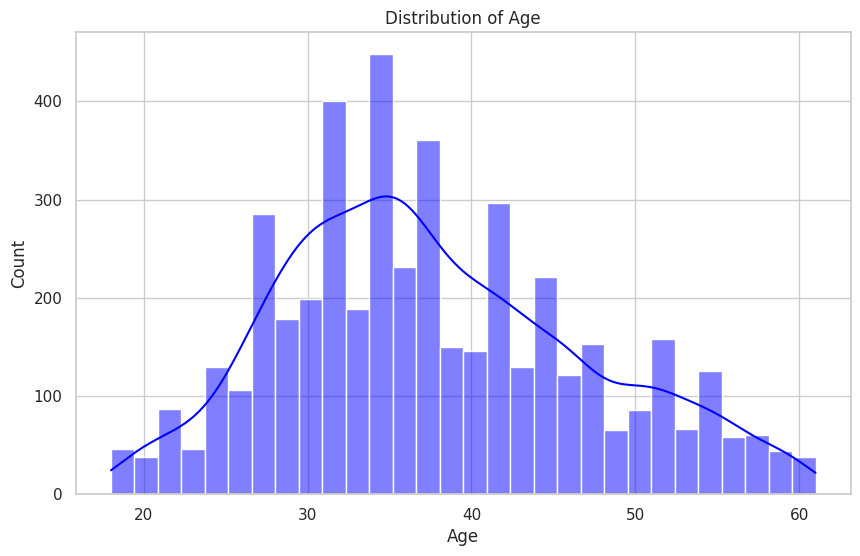

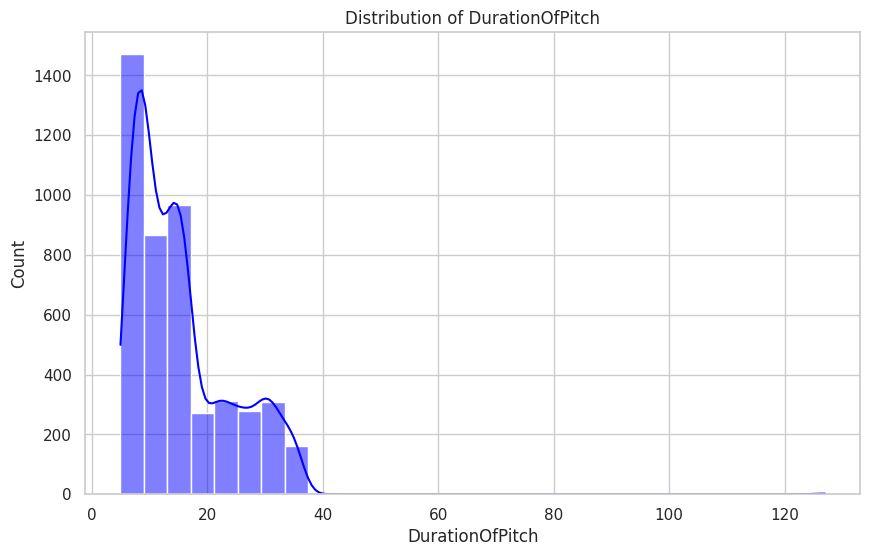

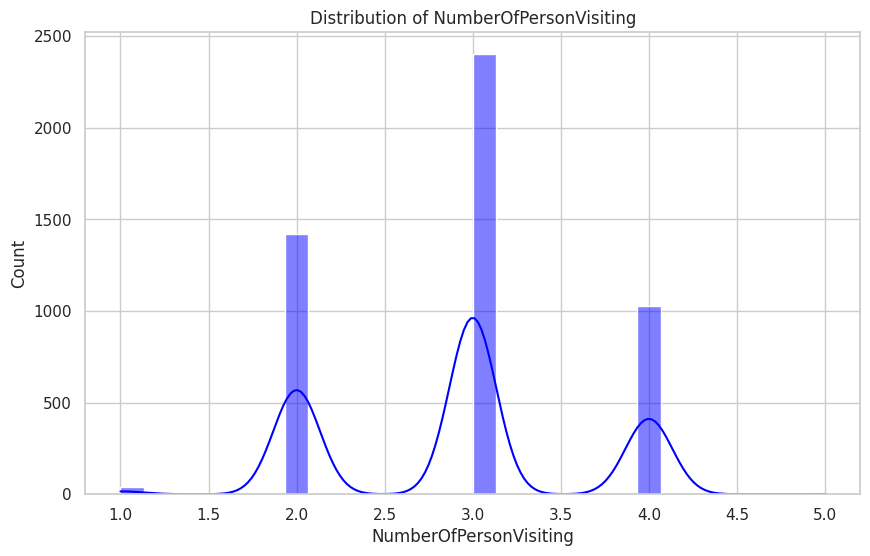

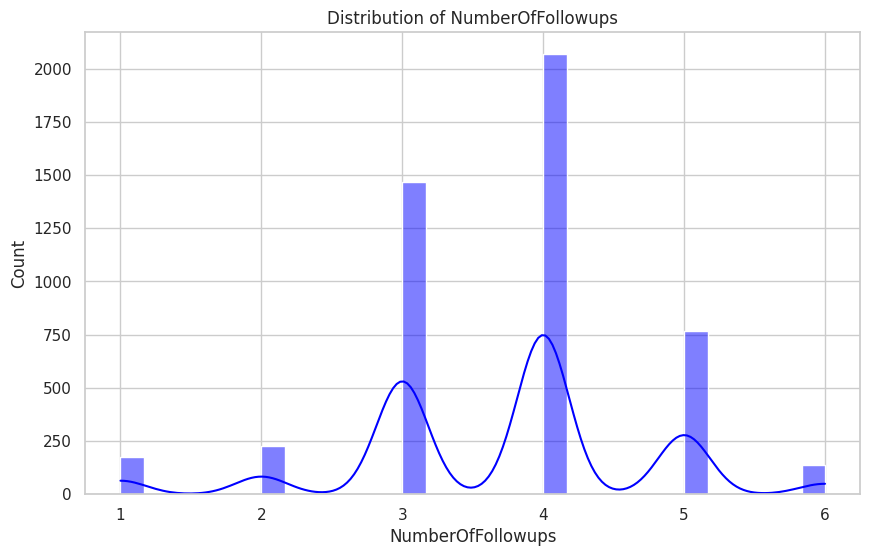

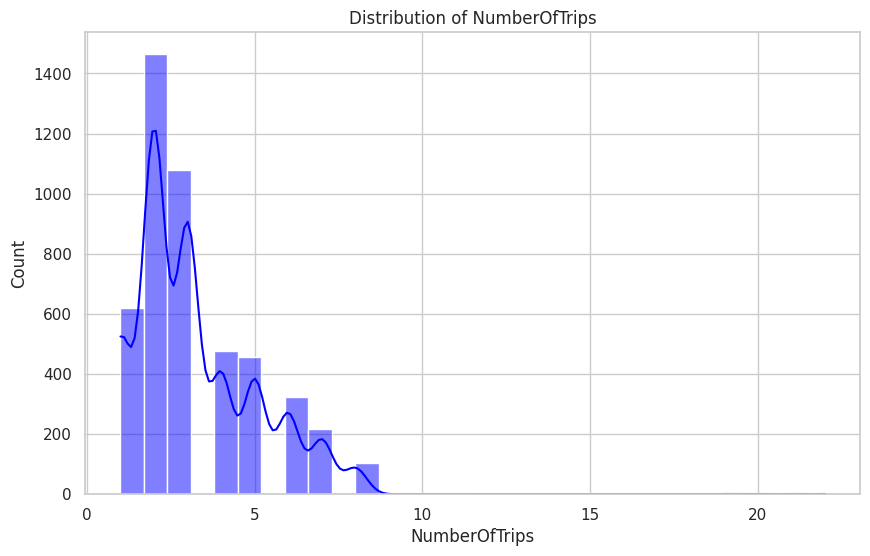

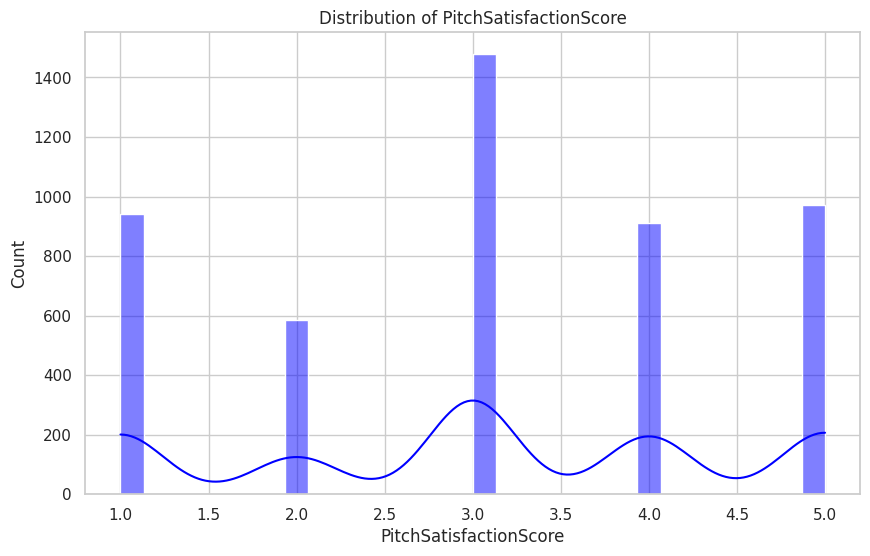

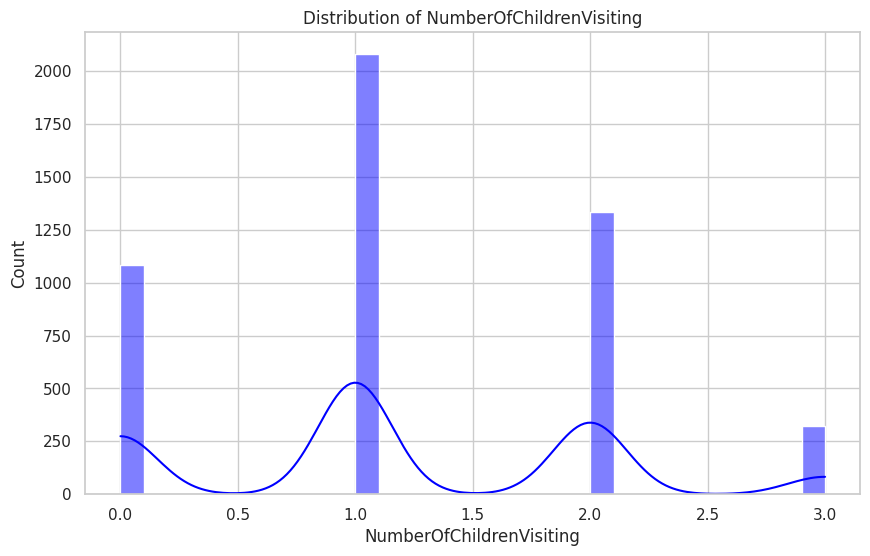

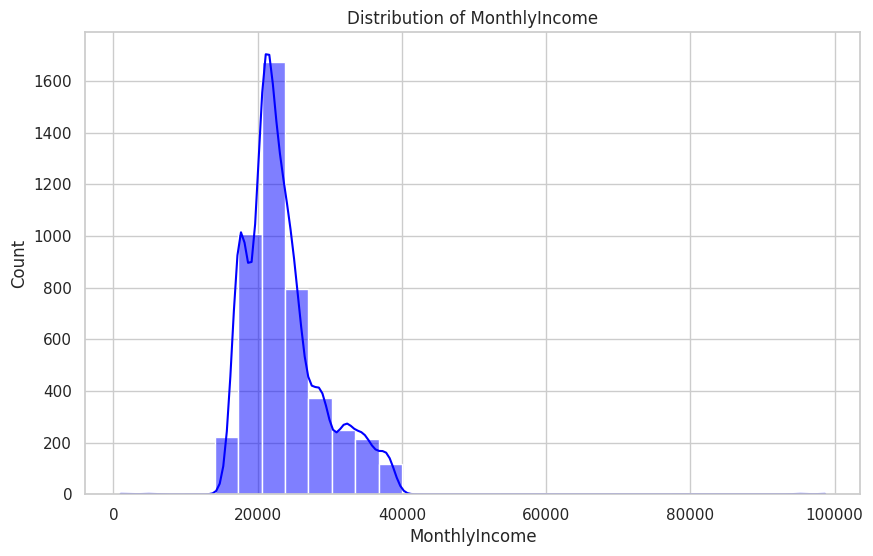

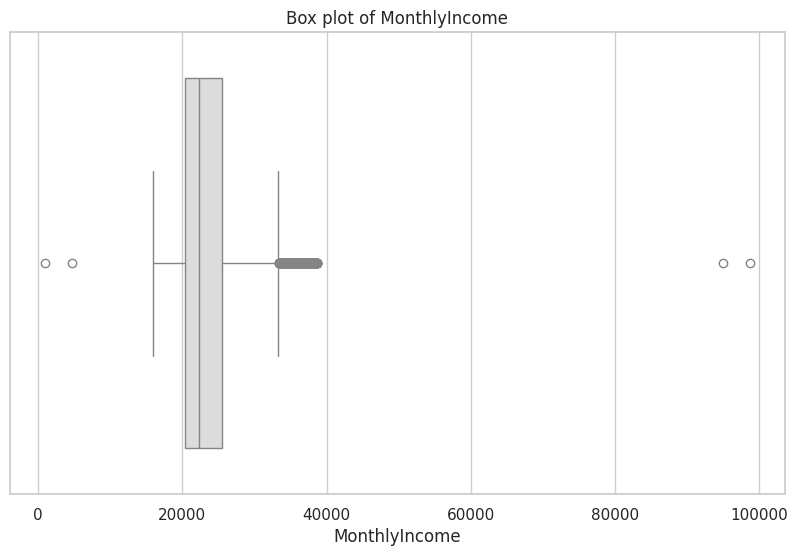

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Function to create bar plots for categorical variables
def plot_bar(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette='coolwarm')
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=45)
    plt.show()

# Function to create histograms for numerical variables
def plot_hist(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Function to create box plots for numerical variables
def plot_box(column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column_name, palette='coolwarm')
    plt.title(f'Box plot of {column_name}')
    plt.show()

# Plotting the columns as per your requirements
# Bar plots for categorical variables
plot_bar('ProdTaken')
plot_bar('TypeofContact')
plot_bar('CityTier')
plot_bar('Occupation')
plot_bar('Gender')
plot_bar('ProductPitched')
plot_bar('PreferredPropertyStar')
plot_bar('MaritalStatus')
plot_bar('Passport')
plot_bar('OwnCar')
plot_bar('Designation')

# Histograms for numerical variables
plot_hist('Age')
plot_hist('DurationOfPitch')
plot_hist('NumberOfPersonVisiting')
plot_hist('NumberOfFollowups')
plot_hist('NumberOfTrips')
plot_hist('PitchSatisfactionScore')
plot_hist('NumberOfChildrenVisiting')
plot_hist('MonthlyIncome')

# Box plot for MonthlyIncome to see the distribution with outliers
plot_box('MonthlyIncome')


In [13]:
import random
import plotly.express as px
import plotly.graph_objs as go
# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()


# Count the occurrences of each ProdTaken value
prod_taken_counts = df['ProdTaken'].value_counts().reset_index()
prod_taken_counts.columns = ['ProdTaken', 'Count']

# Create a bar plot for ProdTaken distribution
fig1 = px.bar(prod_taken_counts, x='ProdTaken', y='Count', title='Distribution of ProdTaken')
fig1.show()

import plotly.figure_factory as ff

# KDE plot for Age distribution
fig2 = ff.create_distplot([df['Age']], ['Age'], show_hist=False, colors=['blue'])
fig2.update_layout(title='Age Distribution (KDE)')
fig2.show()

# Histogram for Monthly Income distribution
fig3 = px.histogram(df, x='MonthlyIncome', nbins=20, title='Monthly Income Distribution', marginal='box')
fig3.show()

# Count the occurrences of each CityTier
city_tier_counts = df['CityTier'].value_counts().reset_index()
city_tier_counts.columns = ['CityTier', 'Count']

# Count the occurrences of each CityTier value
city_tier_counts = df['CityTier'].value_counts().reset_index()
city_tier_counts.columns = ['CityTier', 'Count']

# Create a bar plot for CityTier distribution with specified colors
fig4 = px.bar(city_tier_counts, x='CityTier', y='Count', title='City Tier Distribution',
              color='CityTier', color_discrete_map={1: 'blue', 2: 'green', 3: 'red'})

fig4.update_layout(xaxis=dict(tickmode='linear'))
fig4.show()
# Pie chart for Gender distribution
fig5 = px.pie(df, names='Gender', title='Gender Distribution', hole=0.3)
fig5.show()

# Count the occurrences of each Occupation value
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

# Create a bar plot for Occupation distribution with specified color
fig6 = px.bar(occupation_counts, x='Occupation', y='Count', title='Occupation Distribution',
              color='Occupation', color_discrete_sequence=px.colors.qualitative.Vivid)

fig6.update_layout(showlegend=False)  # Hide the legend if you only want a single color
fig6.show()

# Scatter plot for Age vs Monthly Income
fig7 = px.scatter(df, x='Age', y='MonthlyIncome', color='ProdTaken', title='Age vs Monthly Income')
fig7.show()

# Heatmap of correlations between numerical features
fig8 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Magma'
))
fig8.update_layout(title='Correlation Heatmap')
fig8.show()

# Violin plot for Age distribution by ProdTaken
fig9 = px.violin(df, y='Age', color='ProdTaken', box=True, points="all", title='Age Distribution by ProdTaken')
fig9.show()

# Box plot for Monthly Income by Gender
fig10 = px.box(df, x='Gender', y='MonthlyIncome', color='Gender', title='Monthly Income by Gender')
fig10.show()

product_names = df['ProductPitched'].tolist()

# Count the occurrences of each product
product_counts = {product: product_names.count(product) for product in set(product_names)}

# Generate a list of unique colors
unique_colors = []
for _ in range(len(product_counts)):
    unique_colors.append('#{:06x}'.format(random.randint(0, 256**3-1)))

# Create a bar plot
fig11 = go.Figure(go.Bar(
            x=list(product_counts.keys()),
            y=list(product_counts.values()),
            marker_color=unique_colors  # Assign unique colors to each product
))

# Customize the layout
fig11.update_layout(
    title="Product Distribution",
    xaxis_title="Product Names",
    yaxis_title="Frequency"
)

# Show the plot
fig11.show()


**2.5 Checking for missing values**

In [14]:
# Check for missing values
missing_values = df.isna().sum()

# Display missing values count
print("Missing Values:")
print(missing_values)


Missing Values:
CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


## Phase - III- Data Preparation & [Data Preprocessing](https://colab.research.google.com/drive/1yPV8abIlQTnDYTsQM89Lqnx90xwDuX-7#scrollTo=ZxF5216kfsIW&line=1&uniqifier=1)
**3.1 Handle missing values**


In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming df, num_cols, cat_cols, and imputer are already defined
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
imputer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
    ]
)

imputed_data = imputer.fit_transform(df)

# Convert imputed_data to DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=num_cols.tolist() + cat_cols.tolist())

# Check for missing values
print("After handling missing values:\n",df_imputed.isnull().sum())


After handling missing values:
 CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
TypeofContact               0
Occupation                  0
Gender                      0
ProductPitched              0
MaritalStatus               0
Designation                 0
dtype: int64


In [16]:
# Replace 'Fe Male' with 'Female'
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

**3.2 Data Transformation**

In [17]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Check the DataFrame
print("Encoded DataFrame:")
print(df.head())


Encoded DataFrame:
   CustomerID  ProdTaken        Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.000000              1         3              6.0   
1      200001          0  49.000000              0         1             14.0   
2      200002          1  37.000000              1         1              8.0   
3      200003          0  33.000000              0         1              9.0   
4      200004          0  37.622265              1         1              8.0   

   Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           2       0                       3                3.0   
1           2       1                       3                4.0   
2           0       1                       3                4.0   
3           2       0                       2                3.0   
4           3       1                       2                3.0   

   ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  \
0          

In [72]:
# Define features (X) and target variable (y)
features = df.drop(columns=['ProdTaken']).columns  # Drop the target variable and extract column names
target_variable = 'ProdTaken'

# Extract features (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Display the first few rows of X and y
print("Feature Matrix (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Feature Matrix (X):
   CustomerID        Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000  41.000000              1         3              6.0   
1      200001  49.000000              0         1             14.0   
2      200002  37.000000              1         1              8.0   
3      200003  33.000000              0         1              9.0   
4      200004  37.622265              1         1              8.0   

   Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           2       0                       3                3.0   
1           2       1                       3                4.0   
2           0       1                       3                4.0   
3           2       0                       2                3.0   
4           3       1                       2                3.0   

   ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  \
0               1                    3.0              2            1.0   
1 

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming X and y are already defined and contain categorical features and target variable respectively

# Initialize SelectKBest with chi2 scoring function
selector = SelectKBest(score_func=chi2, k=10)  # Select top 5 features, adjust k as needed

# Fit selector to data
selector.fit(X, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_feature_indices]

# Display selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['CustomerID', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'ProductPitched', 'MaritalStatus', 'Passport', 'Designation',
       'MonthlyIncome'],
      dtype='object')


In [74]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
selection_features = feature_importances.head(10)['Feature'].values

# Print top features
print("Top 10 features:", selection_features)


Top 10 features: ['CustomerID' 'Age' 'MonthlyIncome' 'DurationOfPitch' 'Passport'
 'NumberOfTrips' 'PitchSatisfactionScore' 'MaritalStatus'
 'NumberOfFollowups' 'ProductPitched']


In [76]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize SelectKBest with ANOVA as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 5 features, adjust k as needed

# Fit selector to training data
selector.fit(X, y)

# Get selected feature indices
selectedfeature_indices = selector.get_support(indices=True)

# Get selected feature names
selectedfeatures = X.columns[selectedfeature_indices]

# Print selected feature names
print("Selected Features:")
for feature in selectedfeatures:
    print(feature)


Selected Features:
Age
CityTier
DurationOfPitch
NumberOfFollowups
ProductPitched
PreferredPropertyStar
MaritalStatus
Passport
Designation
MonthlyIncome


In [77]:
# Assuming 'selected_features_chi2', 'top_features', and 'selected_features_anova' contain the selected features from different methods

# Convert the selected features to sets
selected_features_chi2_set = set(selected_features)
top_features_set = set(selection_features)
selected_features_anova_set = set(selectedfeatures)

# Find the intersection of the selected features
intersection_features = selected_features_chi2_set.intersection(top_features_set, selected_features_anova_set)

# Convert the intersection features back to a list
x_selected = list(intersection_features)

# Print the consolidated feature set
print("Intersected Features:")
for feature in x_selected:
    print(feature)


Intersected Features:
DurationOfPitch
MaritalStatus
NumberOfFollowups
MonthlyIncome
Passport
ProductPitched
Age


In [78]:
# Define the features and target variable
X = df[x_selected]
y = df['ProdTaken']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the resulting datasets
print("\nTraining feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)


Training feature set shape: (3421, 7)
Testing feature set shape: (1467, 7)
Training target set shape: (3421,)
Testing target set shape: (1467,)


In [79]:

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the scaled datasets
print("\nScaled Training feature set shape:", X_train_scaled.shape)
print("Scaled Testing feature set shape:", X_test_scaled.shape)



Scaled Training feature set shape: (3421, 7)
Scaled Testing feature set shape: (1467, 7)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.8922972051806408
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1193
           1       0.82      0.55      0.66       274

    accuracy                           0.89      1467
   macro avg       0.86      0.76      0.80      1467
weighted avg       0.89      0.89      0.88      1467



In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform


# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)
y_pred_nb = nb_clf.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Define parameter grids for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_gbm = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Random search for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_grid_rf, n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_scaled, y_train)
best_params_rf = random_search_rf.best_params_
best_rf = random_search_rf.best_estimator_

# Random search for GBM
gbm_clf = GradientBoostingClassifier(random_state=42)
random_search_gbm = RandomizedSearchCV(gbm_clf, param_distributions=param_grid_gbm, n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_gbm.fit(X_train_scaled, y_train)
best_params_gbm = random_search_gbm.best_params_
best_gbm = random_search_gbm.best_estimator_

# Random search for k-NN
knn_clf = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(knn_clf, param_distributions=param_grid_knn, n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_knn.fit(X_train_scaled, y_train)
best_params_knn = random_search_knn.best_params_
best_knn = random_search_knn.best_estimator_

# Define grid search parameters based on best parameters from random search
param_grid_rf_gs = {
    'n_estimators': [best_params_rf['n_estimators'] - 50, best_params_rf['n_estimators'], best_params_rf['n_estimators'] + 50],
    'max_depth': [best_params_rf['max_depth'] - 2, best_params_rf['max_depth'], best_params_rf['max_depth'] + 2],
    'min_samples_split': [best_params_rf['min_samples_split'] - 1, best_params_rf['min_samples_split'], best_params_rf['min_samples_split'] + 1],
    'min_samples_leaf': [best_params_rf['min_samples_leaf'] - 1, best_params_rf['min_samples_leaf'], best_params_rf['min_samples_leaf'] + 1],
    'max_features': [best_params_rf['max_features']]
}

param_grid_gbm_gs = {
    'n_estimators': [best_params_gbm['n_estimators'] - 50, best_params_gbm['n_estimators'], best_params_gbm['n_estimators'] + 50],
    'learning_rate': [best_params_gbm['learning_rate'] - 0.01, best_params_gbm['learning_rate'], best_params_gbm['learning_rate'] + 0.01],
    'max_depth': [best_params_gbm['max_depth'] - 2, best_params_gbm['max_depth'], best_params_gbm['max_depth'] + 2],
    'min_samples_split': [best_params_gbm['min_samples_split'] - 1, best_params_gbm['min_samples_split'], best_params_gbm['min_samples_split'] + 1],
    'min_samples_leaf': [best_params_gbm['min_samples_leaf'] - 1, best_params_gbm['min_samples_leaf'], best_params_gbm['min_samples_leaf'] + 1],
    'max_features': [best_params_gbm['max_features']]
}

param_grid_knn_gs = {
    'n_neighbors': [best_params_knn['n_neighbors'] - 1, best_params_knn['n_neighbors'], best_params_knn['n_neighbors'] + 1],
    'weights': [best_params_knn['weights']],
    'metric': [best_params_knn['metric']]
}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(rf_clf, param_grid=param_grid_rf_gs, cv=3, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
best_params_rf_gs = grid_search_rf.best_params_
best_rf_gs = grid_search_rf.best_estimator_

# Grid search for GBM
grid_search_gbm = GridSearchCV(gbm_clf, param_grid=param_grid_gbm_gs, cv=3, verbose=1, n_jobs=-1)
grid_search_gbm.fit(X_train_scaled, y_train)
best_params_gbm_gs = grid_search_gbm.best_params_
best_gbm_gs = grid_search_gbm.best_estimator_

# Grid search for k-NN
grid_search_knn = GridSearchCV(knn_clf, param_grid=param_grid_knn_gs, cv=3, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)
best_params_knn_gs = grid_search_knn.best_params_
best_knn_gs = grid_search_knn.best_estimator_

# Evaluate the best models

# Random Forest
y_pred_rf_gs = best_rf_gs.predict(X_test_scaled)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf_gs)
print(f"Random Forest Accuracy (Grid Search): {accuracy_rf_gs}")
print("Random Forest Classification Report (Grid Search):")
print(classification_report(y_test, y_pred_rf_gs))

# GBM
y_pred_gbm_gs = best_gbm_gs.predict(X_test_scaled)
accuracy_gbm_gs = accuracy_score(y_test, y_pred_gbm_gs)
print(f"GBM Accuracy (Grid Search): {accuracy_gbm_gs}")
print("GBM Classification Report (Grid Search):")
print(classification_report(y_test, y_pred_gbm_gs))

# k-NN
y_pred_knn_gs = best_knn_gs.predict(X_test_scaled)
accuracy_knn_gs = accuracy_score(y_test, y_pred_knn_gs)
print(f"k-NN Accuracy (Grid Search): {accuracy_knn_gs}")
print("k-NN Classification Report (Grid Search):")
print(classification_report(y_test, y_pred_knn_gs))


Naive Bayes Accuracy: 0.8329925017041582
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1193
           1       0.58      0.39      0.47       274

    accuracy                           0.83      1467
   macro avg       0.72      0.66      0.68      1467
weighted avg       0.82      0.83      0.82      1467

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Random Forest Accuracy (Grid Search): 0.8813905930470347
Random Forest Classification Report (Grid Search):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1193
          

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from tabulate import tabulate

# Handle missing values (this can be adjusted based on your data)
df.fillna(method='ffill', inplace=True)

# Select categorical columns
cat_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

# Initialize LabelEncoder and encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
df[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'MonthlyIncome']] = scaler.fit_transform(df[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'MonthlyIncome']])

# Define features (X) and target variable (y)
features = df.drop(columns=['ProdTaken']).columns
target_variable = 'ProdTaken'

# Extract features (X) and target variable (y)
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Define the list of possible products
products = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']

# Filter the customers who haven't bought any product (ProdTaken = 0)
unbought_customers = df[df['ProdTaken'] == 0]

# Prepare a DataFrame to store recommendations
recommendations = []

for index, customer in unbought_customers.iterrows():
    customer_data = customer.drop(labels=['ProdTaken']).values.reshape(1, -1)

    # Predict probabilities for all products
    product_probabilities = model.predict_proba(customer_data)[0]

    # Find the index of the product with the highest probability
    max_prob_index = product_probabilities.argmax()

    # Get the recommended product and its probability
    recommended_product = products[max_prob_index]
    probability = product_probabilities[max_prob_index]

    recommendations.append({
        'CustomerID': customer['CustomerID'],
        'RecommendedProduct': recommended_product,
        'Probability': probability
    })

# Convert recommendations to a DataFrame for better visualization
recommendations_df = pd.DataFrame(recommendations)

# Print the recommendations as a table
print(tabulate(recommendations_df, headers='keys', tablefmt='psql'))


+------+--------------+----------------------+---------------+
|      |   CustomerID | RecommendedProduct   |   Probability |
|------+--------------+----------------------+---------------|
|    0 |       200001 | Basic                |      0.980831 |
|    1 |       200003 | Basic                |      0.96721  |
|    2 |       200004 | Basic                |      0.964876 |
|    3 |       200005 | Basic                |      0.923712 |
|    4 |       200006 | Basic                |      0.969372 |
|    5 |       200007 | Basic                |      0.996213 |
|    6 |       200008 | Basic                |      0.944901 |
|    7 |       200009 | Basic                |      0.997764 |
|    8 |       200010 | Basic                |      0.985572 |
|    9 |       200011 | Basic                |      0.977951 |
|   10 |       200012 | Basic                |      0.999126 |
|   11 |       200013 | Basic                |      0.997463 |
|   12 |       200015 | Basic                |      0.9

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise.accuracy import rmse
from tabulate import tabulate

# Handle missing values (this can be adjusted based on your data)
df.fillna(method='ffill', inplace=True)

# Select relevant columns
data = df[['CustomerID', 'ProductPitched', 'ProdTaken']]

# Load data into Surprise's Dataset format
reader = Reader(rating_scale=(0, 1))
surprise_data = Dataset.load_from_df(data, reader)

# Split the data into train and test sets
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.3, random_state=42)

# Train the collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': False}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Generate recommendations for each unbought product
recommendations = []
for customer_id in df[df['ProdTaken'] == 0]['CustomerID']:
    products = [product for product in df['ProductPitched'].unique() if product != 'Unknown']
    for product in products:
        prediction = model.predict(customer_id, product)
        recommendations.append({
            'CustomerID': customer_id,
            'RecommendedProduct': product,
            'Probability': prediction.est
        })

# Convert recommendations to a DataFrame
recommendations_df = pd.DataFrame(recommendations)

# Print the recommendations as a table
print(tabulate(recommendations_df, headers='keys', tablefmt='psql'))


Streaming output truncated to the last 5000 lines.
| 14841 |       203622 |                    0 |      0.189711 |
| 14842 |       203622 |                    3 |      0.189711 |
| 14843 |       203622 |                    4 |      0.189711 |
| 14844 |       203622 |                    2 |      0.189711 |
| 14845 |       203623 |                    1 |      0        |
| 14846 |       203623 |                    0 |      0.189711 |
| 14847 |       203623 |                    3 |      0.189711 |
| 14848 |       203623 |                    4 |      0.189711 |
| 14849 |       203623 |                    2 |      0.189711 |
| 14850 |       203624 |                    1 |      0.189711 |
| 14851 |       203624 |                    0 |      0        |
| 14852 |       203624 |                    3 |      0.189711 |
| 14853 |       203624 |                    4 |      0.189711 |
| 14854 |       203624 |                    2 |      0.189711 |
| 14855 |       203625 |                    1 |      

In [96]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357237 sha256=15a46a9a132cefa2fbb828a5a8a4ef03c51155125a2fadfc46e87ac82f2542dd
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, KNNBasic

# Handle missing values (this can be adjusted based on your data)
df.fillna(method='ffill', inplace=True)

# Select relevant columns
data = df[['CustomerID', 'ProductPitched', 'ProdTaken']]

# Load data into Surprise's Dataset format
reader = Reader(rating_scale=(0, 1))
surprise_data = Dataset.load_from_df(data, reader)

# Split the data into train and test sets
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.3, random_state=42)

# Train the collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': False}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Generate recommendations for each unbought product
recommendations = {}
for customer_id in df[df['ProdTaken'] == 0]['CustomerID']:
    products = [product for product in df['ProductPitched'].unique() if product != 'Unknown']
    best_probability = 0
    best_product = None
    for product in products:
        prediction = model.predict(customer_id, product)
        probability = prediction.est
        if probability > best_probability:
            best_probability = probability
            best_product = product
    recommendations[customer_id] = best_product
# Dictionary to map numerical product codes to their corresponding product names
product_names = {
    0: 'Basic',
    1: 'Standard',
    2: 'Deluxe',
    3: 'Super Deluxe',
    4: 'King'
}

# Print only the customer ID and the recommended product with the highest probability
for customer_id, recommended_product_code in recommendations.items():
    recommended_product_name = product_names.get(recommended_product_code, 'Unknown')
    print(f"CustomerID: {customer_id}, RecommendedProduct: {recommended_product_name}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
CustomerID: 200001, RecommendedProduct: Basic
CustomerID: 200003, RecommendedProduct: Standard
CustomerID: 200004, RecommendedProduct: Standard
CustomerID: 200005, RecommendedProduct: Standard
CustomerID: 200006, RecommendedProduct: Standard
CustomerID: 200007, RecommendedProduct: Standard
CustomerID: 200008, RecommendedProduct: Standard
CustomerID: 200009, RecommendedProduct: Standard
CustomerID: 200010, RecommendedProduct: Standard
CustomerID: 200011, RecommendedProduct: Standard
CustomerID: 200012, RecommendedProduct: Standard
CustomerID: 200013, RecommendedProduct: Standard
CustomerID: 200015, RecommendedProduct: Standard
CustomerID: 200016, RecommendedProduct: Standard
CustomerID: 200017, RecommendedProduct: Standard
CustomerID: 200018, RecommendedProduct: Standard
CustomerID: 200019, RecommendedProduct: Standard
CustomerID: 200020, RecommendedProduct: Basic
CustomerID: 200022, RecommendedProduct: Standard

In [102]:
# Convert numerical product codes to product names
predictions_flat = [(user_id, product_names.get(product_id, 'Unknown')) for user_id, product_id in predictions_flat]

# Extract ground truth product IDs and predicted product IDs
ground_truth_ids = [str(product_id) for _, product_id in ground_truth_flat]
predicted_ids = [str(product_id) for _, product_id in predictions_flat]

# Compute evaluation metrics
precision = precision_score(ground_truth_ids, predicted_ids, average='micro')
recall = recall_score(ground_truth_ids, predicted_ids, average='micro')
f1 = f1_score(ground_truth_ids, predicted_ids, average='micro')
accuracy = accuracy_score(ground_truth_ids, predicted_ids)

# Print evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Accuracy: 0.0000
